# 데이터 분석
- week 칼럼은 수~화요일을 한 단위로 주를 구분한 것임

## 1. 데이터 읽어오기

In [1]:
# 데이터 읽어오기
import pandas as pd
df = pd.read_csv("toss_data.csv", encoding="utf-8")
df.head(3)

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
0,2020-01-03,토스 kb국민카드 쓰는 사람있어?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,토스 kb국민카드 쓰는 사람있어? 그 파란색 카드 ㅇㅇ 혹시 갤러 중에 쓰는 사람 ...,0,0,토스 kb 국민카드 쓰는 사람 있어? 그 파란색 카드 ㅇㅇ 혹시 갤러 중에 쓰는 사...,"['토스', '국민카드', '파란색', '카드', '혹시', '갤러', '카드', ...","['토스 국민카드', '국민카드 파란색', '파란색 카드', '카드 혹시', '혹시..."
1,2020-01-04,24군필 휴학생 신카 뚫기 가능?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,24군필 휴학생 신카 뚫기 가능? 주말알바 11개월째 하는중 평균 월급 70~90(...,0,0,24군 필 휴 학생 신카 뚫기 가능? 주말 알바 11개월째 하는 중 평균 월급 70...,"['학생', '신카', '가능?', '주말', '알바', '평균', '월급', '문...","['학생 신카', '신카 가능?', '가능? 주말', '주말 알바', '알바 평균'..."
2,2020-01-04,토스에서 나온 신용등급 그거 믿을만한거냐,https://gall.dcinside.com/board/view/?id=credi...,creditcard,금융거래엔 올크레딧 나이스 두군데를 주로 봄토스가 제공하는 건 올크레딧 신용등급임나...,1,0,금융거래엔 올 크레딧 나이스 두 군데를 주로 봄 토스가 제공하는 건 올크레딧 신용등...,"['금융', '거래', '크레딧', '나이스', '토스', '제공', '크레딧', ...","['금융 거래', '거래 크레딧', '크레딧 나이스', '나이스 토스', '토스 제..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68953 entries, 0 to 68952
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            68953 non-null  object
 1   title           68953 non-null  object
 2   url             68953 non-null  object
 3   media           68953 non-null  object
 4   content         68953 non-null  object
 5   is_comment      68953 non-null  int64 
 6   week            68953 non-null  int64 
 7   spaced_content  68953 non-null  object
 8   tokens          68953 non-null  object
 9   bigrams         68953 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.3+ MB


In [21]:
unique_dates = df['date'].unique().tolist()
unique_dates[-30:]

['2023-09-04',
 '2023-09-05',
 '2023-09-06',
 '2023-09-07',
 '2023-09-08',
 '2023-09-09',
 '2023-09-10',
 '2023-09-11',
 '2023-09-12',
 '2023-09-13',
 '2023-09-14',
 '2023-09-15',
 '2023-09-16',
 '2023-09-17',
 '2023-09-18',
 '2023-09-19',
 '2023-09-20',
 '2023-09-21',
 '2023-09-22',
 '2023-09-23',
 '2023-09-24',
 '2023-09-25',
 '2023-09-26',
 '2023-09-27',
 '2023-09-28',
 '2023-09-29',
 '2023-09-30',
 '2023-10-01',
 '2023-10-02',
 '2023-10-03']

In [22]:
len(unique_dates)

1265

## 2. 데이터 시각화

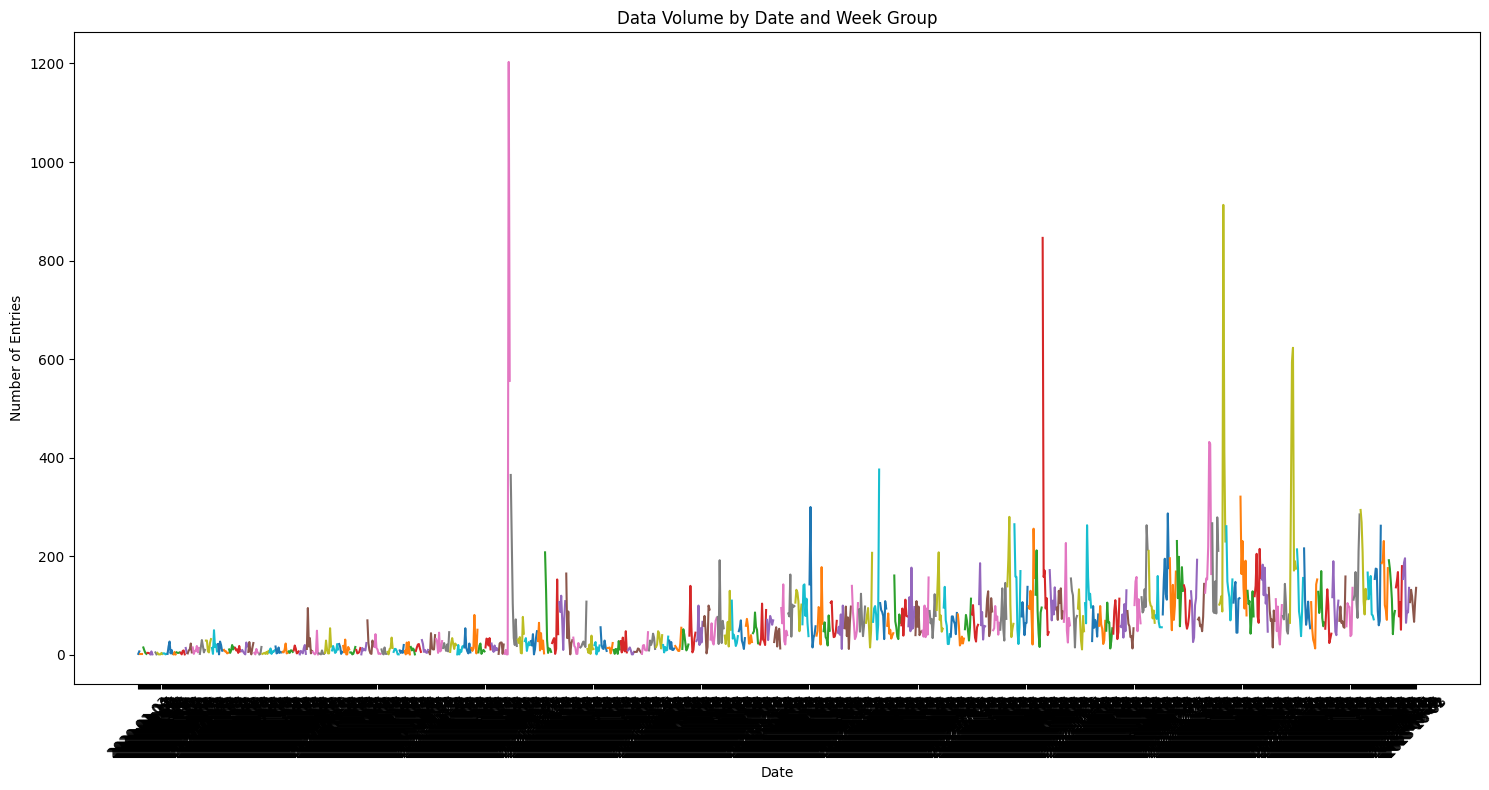

In [24]:
# 범례 없이 그룹별 데이터 시각화
plt.figure(figsize=(15, 8))
for week in grouped_data['week'].unique():
    week_data = grouped_data[grouped_data['week'] == week]
    plt.plot(week_data['date'], week_data['count'], label=f'Week {week}')

plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.title('Data Volume by Date and Week Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. week별 정보 기록하는 df_week만들어, 데이터가 폭증했을 때가 언제인지 분석

In [26]:
# 새로운 DataFrame 생성: 'week' 별로 데이터 개수 계산
df_week = df.groupby('week')['date'].count().reset_index(name='count')

In [27]:
# 결과 확인
df_week.head(10)

,week,count
0,0,5
1,1,2
2,2,27
3,3,9
4,4,9
5,5,1
6,6,5
7,7,6
8,8,11
9,9,9


In [28]:
# 데이터가 많은 상위 10개 week
# 데이터가 많은 순서대로 상위 10개 week 추출
top_10_weeks = df_week.sort_values(by='count', ascending=False).head(10)

# 결과 확인
top_10_weeks

,week,count
178,178,1908
168,168,1730
166,166,1420
66,66,1414
143,143,1252
171,171,1034
167,167,1027
188,188,1018
160,160,1014
187,187,954


### 3-a. week == 178

In [31]:
# week == 178에 해당하는 데이터만 필터링하여 새로운 DataFrame 생성
df_178 = df_filtered[df_filtered['week'] == 178].reset_index(drop=True)

# 결과 확인
df_178.head(100)

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
0,2023-05-31,머리 덥수룩한 성범죄자상 아재가,https://gall.dcinside.com/board/view/?id=cs_ne...,cs_new1,머리 덥수룩한 성범죄자상 아재가 토스카드로 담배사려다가 거래정지 떴는데 이거 분실카...,0,178,머리 덥수룩한 성범죄자상 아재가 토스카드로 담배 사려다가 거래 정지 떴는데 이 거 ...,"['머리', '성범죄', '자상', '아재', '토스카드', '담배', '거래', ...","['머리 성범죄', '성범죄 자상', '자상 아재', '아재 토스카드', '토스카드..."
1,2023-05-31,팅고 이거 ㅂㅅ이네,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,팅고 이거 ㅂㅅ이네 실적이랑 주가 괴리 ㅈㄴ 심해서 저평가인가 싶었는데헤지펀드들이 ...,0,178,팅 고 이 거 ㅂㅅ이 네 실적이랑 주가 괴리 ㅈㄴ 심해서 저평가인 가 싶었는데 헤지...,"['ㅂㅅ', '실적', '괴리', 'ㅈㄴ', '평가', '헤지', '펀드', '바보...","['ㅂㅅ 실적', '실적 괴리', '괴리 ㅈㄴ', 'ㅈㄴ 평가', '평가 헤지', ..."
2,2023-05-31,Ards 오랜만,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,Ards 오랜만 Aridis AR-301의 단일 확인 3상 연구 및 임상 연구 설...,0,178,Ards 오랜만 Aridis AR-301의 단일 확인 3상 연구 및 임상 연구 설계...,"['오랜만', '단일', '확인', '연구', '임상', '연구', '설계', '계...","['오랜만 단일', '단일 확인', '확인 연구', '연구 임상', '임상 연구',..."
3,2023-05-31,토스 Tio 종토방 보니,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,그럼 뭐때메 내림?,1,178,그럼 뭐 때 메 내림?,['내림'],['내림']
4,2023-05-31,토스 Tio 종토방 보니,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,공매도 아는게 어디냐...,1,178,공매도 아는 게 어디냐...,['공매'],['공매']
...,...,...,...,...,...,...,...,...,...,...
95,2023-06-01,팅고그룹은 좆박고있는데 애들이 뭘믿는거냐,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,팅고그룹은 좆박고있는데 애들이 뭘믿는거냐 토스팅고종토방은 뭘믿고있는거냐대체,0,178,팅고그룹은 좆 박고 있는데 애들이 뭘 믿는 거냐 토스팅 고종 토방은 뭘 믿고 있는 ...,"['그룹', '토스', '고종', '토방', '대체']","['그룹 토스', '토스 고종', '고종 토방', '토방 대체']"
96,2023-06-01,토스 상담사 후기,https://gall.dcinside.com/mgallery/board/view/...,mvnogallery,토스 상담사 후기 궁금증 풀렸으면 개추,0,178,토스 상담사 후기 궁금증 풀렸으면 개추,"['토스', '상담', '후기', '궁금증', '개추']","['토스 상담', '상담 후기', '후기 궁금증', '궁금증 개추']"
97,2023-06-01,저 토스 질문하나만 받아주세요,https://gall.dcinside.com/mgallery/board/view/...,stockus,환율?,1,178,환율?,['환율'],['환율']
98,2023-06-01,저 토스 질문하나만 받아주세요,https://gall.dcinside.com/mgallery/board/view/...,stockus,저 토스 질문하나만 받아주세요 왜 원화랑 달러랑 수익차이가 크게 나는거에요????,0,178,저 토스 질문 하나만 받아주세요 왜 원화랑 달러랑 수익차이가 크게 나는 거에요????,"['토스', '질문', '하나', '원화', '달러', '수익', '차이']","['토스 질문', '질문 하나', '하나 원화', '원화 달러', '달러 수익', ..."


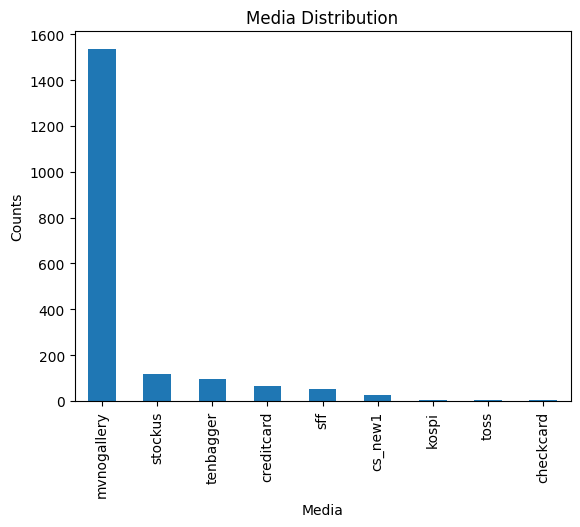

In [38]:
media_counts_178 = df_178['media'].value_counts()
media_counts_178.plot(kind='bar', title='Media Distribution')
plt.xlabel('Media')
plt.ylabel('Counts')
plt.show()

In [32]:
# 데이터 파일로 저장
df_178.to_csv("df_178.csv", index=False, encoding="utf-8")

### 3-b. week 168

In [55]:
df_168 = df_filtered[df_filtered['week'] == 168].reset_index(drop=True)

# 결과 확인
df_168.head()

df_168.iloc(0)[4]['url']

'https://gall.dcinside.com/mgallery/board/view/?id=stockus&no=5422473&search_pos=-5410000&s_type=search_subject_memo&s_keyword=.ED.86.A0.EC.8A.A4&page=1'

In [46]:
df_168.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1730 non-null   object
 1   title           1730 non-null   object
 2   url             1730 non-null   object
 3   media           1730 non-null   object
 4   content         1730 non-null   object
 5   is_comment      1730 non-null   int64 
 6   week            1730 non-null   int64 
 7   spaced_content  1730 non-null   object
 8   tokens          1730 non-null   object
 9   bigrams         1730 non-null   object
dtypes: int64(2), object(8)
memory usage: 135.3+ KB


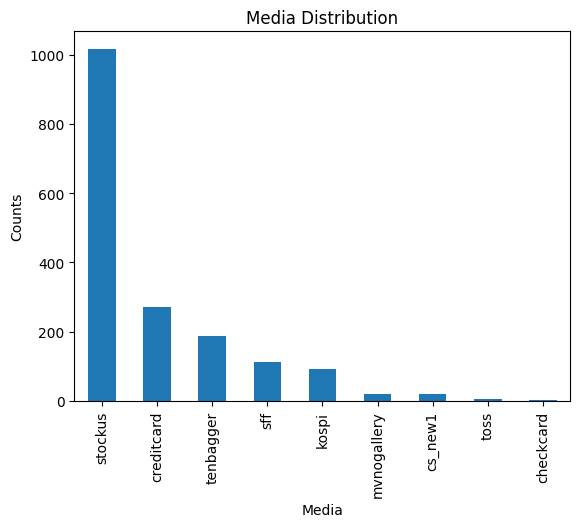

In [35]:
media_counts = df_168['media'].value_counts()
media_counts.plot(kind='bar', title='Media Distribution')
plt.xlabel('Media')
plt.ylabel('Counts')
plt.show()

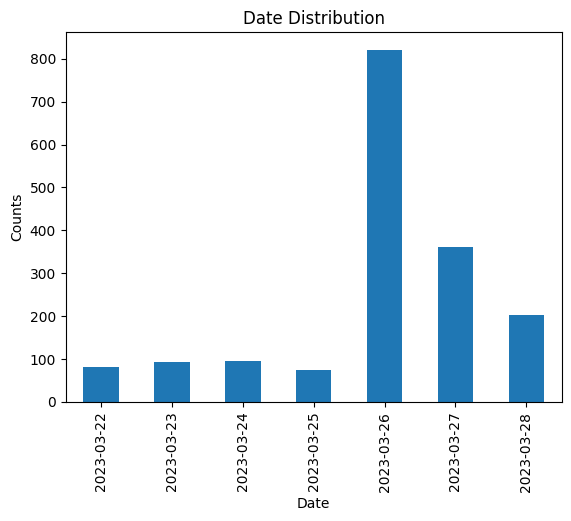

In [41]:
# 'date' 칼럼의 날짜별 분포 시각화
date_counts_168 = df_168['date'].value_counts().sort_index()
date_counts_168.plot(kind='bar', title='Date Distribution')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()

### 3-c. week 166

In [36]:
df_166 = df_filtered[df_filtered['week'] == 166].reset_index(drop=True)

# 결과 확인
df_166.head(30)

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
0,2023-03-08,귀국해서 토스 만든거 개후회중,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,귀국해서 토스 만든거 개후회중 뭔 없는종목이 이렇게 많냐 ㅋㅋ 한달제한있어서 딴 증...,0,166,귀국해서 토스 만든 거 개후회 중 뭔 없는 종목이 이렇게 많냐 ㅋㅋ 한 달 제한 있...,"['귀국', '토스', '후회', '종목', '증권사', '계좌', '만드', '해...","['귀국 토스', '토스 후회', '후회 종목', '종목 증권사', '증권사 계좌'..."
1,2023-03-08,스틀팩딱좌처럼 글로벌 쓰지말고,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,해선하려면 글로벌,1,166,해선하려면 글로벌,"['해선', '글로벌']",['해선 글로벌']
2,2023-03-08,토스 TRKA 주주 오늘 예상,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,토스 TRKA 주주 오늘 예상 프장시작 김치들이 불나방처럼 올린토리카 (0.3-...,0,166,토스 TRKA 주주 오늘 예상 프장 시작 김치들이 불나방처럼 올린 토리카 (0.3-...,"['토스', '주주', '예상', '프장', '시작', '김치', '불나방', '토...","['토스 주주', '주주 예상', '예상 프장', '프장 시작', '시작 김치', ..."
3,2023-03-08,스틀팩딱좌처럼 글로벌 쓰지말고,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,너 키움직원이지,1,166,너 키 움 직원이지,['직원'],['직원']
4,2023-03-08,토스 TRKA 주주 오늘 예상,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,이제 나락만 남았제,1,166,이제 나락만 남았제,['나락'],['나락']
5,2023-03-08,실적발표일 정확하게 아는사람있음?,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,실적발표일 정확하게 아는사람있음? 사전공시없이 그냥 기간안에 툭 던져도 되는게 실적...,0,166,실적 발표일 정확하게 아는 사람 있음? 사 전공시 없이 그냥 기간 안에 툭 던져도 ...,"['실적', '발표', '정확', '있음?', '전공', '기간', '실적', '임...","['실적 발표', '발표 정확', '정확 있음?', '있음? 전공', '전공 기간'..."
6,2023-03-08,토스 TRKA 주주 오늘 예상,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,멘틀까지 뚫을 예정,1,166,멘틀까지 뚫을 예정,['예정'],['예정']
7,2023-03-08,귀국해서 토스 만든거 개후회중,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,ㅋㅋ 아니 근데 해주갤 티커들 안사고 구경만 해도 재미는 있음,1,166,ㅋㅋ 아니 근데 해주갤 티커들 안 사고 구경만 해도 재미는 있음,"['해주갤', '티커', '구경', '재미']","['해주갤 티커', '티커 구경', '구경 재미']"
8,2023-03-08,오늘 멀런 산 이유,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,오늘 멀런 산 이유 토스에 멀런 마크 생김 너무 귀엽자노? ㅋ,0,166,오늘 멀런 산 이유 토스에 멀런 마크 생김 너무 귀엽자 노? ㅋ,"['멀런', '이유', '토스', '멀런', '마크', '생김', '귀엽']","['멀런 이유', '이유 토스', '토스 멀런', '멀런 마크', '마크 생김', ..."
9,2023-03-08,오늘 멀런 산 이유,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,얘 상폐 위기 인제 벗어났나봄?,1,166,얘 상폐 위기 인 제 벗어났나봄?,"['상폐', '위기']",['상폐 위기']


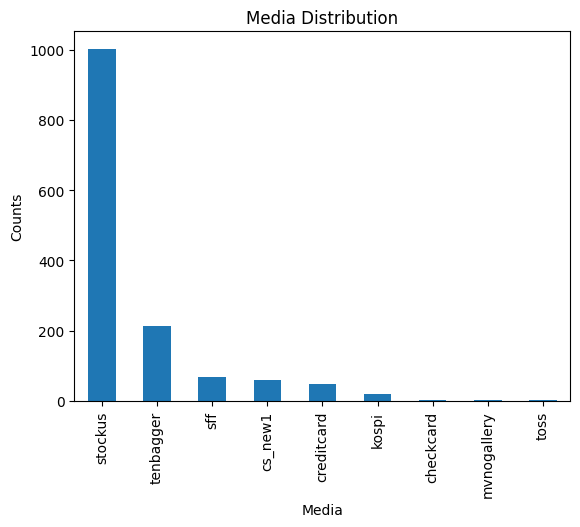

In [37]:
media_counts_166 = df_166['media'].value_counts()
media_counts_166.plot(kind='bar', title='Media Distribution')
plt.xlabel('Media')
plt.ylabel('Counts')
plt.show()

### 3-d. week 66

In [57]:
df_66 = df_filtered[df_filtered['week'] == 66].reset_index(drop=True)

# 결과 확인
df_66.tail(20)

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
1394,2021-04-13,토스증권 ㅅㅂ련들 바로 계좌해지 ㅋㅋㅋㅋㅋ,https://gall.dcinside.com/mgallery/board/view/...,stockus,ㄹㅇ.. 하림,1,66,ㄹㅇ.. 하림,['하림'],['하림']
1395,2021-04-13,토스증권 ㅅㅂ련들 바로 계좌해지 ㅋㅋㅋㅋㅋ,https://gall.dcinside.com/mgallery/board/view/...,stockus,토스증권 ㅅㅂ련들 바로 계좌해지 ㅋㅋㅋㅋㅋ 대한해운 받을려고 정보 판 내 자신이 븅...,0,66,토스증권 ㅅㅂ련들 바로 계좌 해지 ㅋㅋㅋㅋㅋ 대한해운 받을려고 정보 판 내 자신이 ...,"['토스증권', '계좌', '해지', '대한', '해운', '정보', '자신', '...","['토스증권 계좌', '계좌 해지', '해지 대한', '대한 해운', '해운 정보'..."
1396,2021-04-13,토스 이정도면 ㅍㅌㅊ는되냐,https://gall.dcinside.com/mgallery/board/view/...,stockus,네이버 받은 년도 있더만,1,66,네이버 받은 년도 있더만,['네이버'],['네이버']
1397,2021-04-13,토스증권 호가창 씨발 ㅋㅋㅋㅋ,https://gall.dcinside.com/mgallery/board/view/...,stockus,깔끔하고 쓸모없는 호가창 ㄷㄷ,1,66,깔끔하고 쓸모 없는 호가 창 ㄷㄷ,"['쓸모', '호가']",['쓸모 호가']
1398,2021-04-13,토스는 그렇게 사업하나하나 다 말아먹고도 살아있는게 신기,https://gall.dcinside.com/mgallery/board/view/...,stockus,토스는 그렇게 사업하나하나 다 말아먹고도 살아있는게 신기 저금리의 힘인가?,0,66,토스는 그렇게 사업 하나하나 다 말아먹고도 살아있는 게 신기 저금리의 힘인가?,"['토스', '사업', '말아먹', '신기', '저금리']","['토스 사업', '사업 말아먹', '말아먹 신기', '신기 저금리']"
1399,2021-04-13,월스트리트도 지금 차트보고 하고 있는데 토스는 뭘 믿고 카시노처럼함??,https://gall.dcinside.com/mgallery/board/view/...,stockus,아니 씨발 어차피 일주치 한달치 일년치 그래프 보여주는 데 그날 호가창 봐서 뭐하냐...,1,66,아니 씨 발 어차피 일주치 한 달치 일년치 그래프 보여주는 데 그날 호가 창 봐서 ...,"['일주', '달치', '그래프', '그날', '호가', '차이', '장투', '이...","['일주 달치', '달치 그래프', '그래프 그날', '그날 호가', '호가 차이'..."
1400,2021-04-13,토스증권 ㅅㅂ련들 바로 계좌해지 ㅋㅋㅋㅋㅋ,https://gall.dcinside.com/mgallery/board/view/...,stockus,ㄹㅇ.. 하림,1,66,ㄹㅇ.. 하림,['하림'],['하림']
1401,2021-04-13,토스는 그렇게 사업하나하나 다 말아먹고도 살아있는게 신기,https://gall.dcinside.com/mgallery/board/view/...,stockus,외계문명의 힘,1,66,외계문명의 힘,"['외계', '문명']",['외계 문명']
1402,2021-04-13,토스증권 미친놈들이네,https://gall.dcinside.com/mgallery/board/view/...,stockus,라할살 모음 ㅋㅋ,1,66,라 할 살 모음 ㅋㅋ,['모음'],['모음']
1403,2021-04-13,토스 = 피싸개 전용 ㅇㅇ,https://gall.dcinside.com/mgallery/board/view/...,stockus,토스 = 피싸개 전용 ㅇㅇ HTS/MTS에도 '감성'이 필요하다회전율 높은 한남이랑...,0,66,토스 = 피싸 개 전용 ㅇㅇ HTS/MTS에도 '감성'이 필요하다 회전율 높은 한남...,"['토스', '전용', '감성', '필요', '회전율', '한남', '다르', '투...","['토스 전용', '전용 감성', '감성 필요', '필요 회전율', '회전율 한남'..."


### 3-e. week 187

In [58]:
df_187 = df_filtered[df_filtered['week'] == 187].reset_index(drop=True)

# 결과 확인
df_187.tail(20)

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
934,2023-08-08,마 토스님께서 살려주려는데 어찌 하찮은 것들이,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,마 토스님께서 살려주려는데 어찌 하찮은 것들이 빨리 절해라 ㅋㅋㅋㅋㅋㅋ,0,187,마 토스님께서 살려주려는 데 어찌 하찮은 것들이 빨리 절해라 ㅋㅋㅋㅋㅋㅋ,"['토스', '하찮', '절해']","['토스 하찮', '하찮 절해']"
935,2023-08-08,토스는 신임 ㅇㅇ,https://gall.dcinside.com/board/view/?id=credi...,creditcard,발행어음 CMA 3.6퍼임,1,187,발행어음 CMA 3.6 퍼임,"['발행', '어음']",['발행 어음']
936,2023-08-08,토스종토 개꿀잼이라니깐 ㅋㅋ,https://gall.dcinside.com/mgallery/board/view/...,stockus,내가 문해력이 딸린다!! 요약좀 시발것,1,187,내가 문해력이 딸린다!! 요약 좀 시 발것,"['문해력', '요약']",['문해력 요약']
937,2023-08-08,토스는 신임 ㅇㅇ,https://gall.dcinside.com/board/view/?id=credi...,creditcard,안전성 때문에 진짜 파킹통장을 1금융 쓰겠다? -토스 카뱅 케뱅 또이또이메이저 증권...,1,187,안전성 때문에 진짜 파킹 통장을 1금융 쓰겠다? -토스 카뱅 케뱅 또 이 또 이 메...,"['안전성', '파킹', '통장', '금융', '토스', '카뱅', '케뱅', '메...","['안전성 파킹', '파킹 통장', '통장 금융', '금융 토스', '토스 카뱅',..."
938,2023-08-08,토스는 신임 ㅇㅇ,https://gall.dcinside.com/board/view/?id=credi...,creditcard,또 지금 올해 연말까지인가? 카카오페이에 30만원까지만 5퍼 연이율 줌..(매일 받...,1,187,또 지금 올해 연말까지 인가? 카카오페이에 30만원까지만 5 퍼 연이율 줌..(매일...,"['올해', '연말', '카카오페이', '30만원', '연이율', '가능', '30...","['올해 연말', '연말 카카오페이', '카카오페이 30만원', '30만원 연이율'..."
939,2023-08-08,토스 안팔리면 여기서 이러지말고,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,근데 오르네,1,187,근데 오르네,['오르'],['오르']
940,2023-08-08,신카 캐시백이벤트 어디서해야됨?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,신카 캐시백이벤트 어디서해야됨? 카카오랑 페이코는 현금화 안됨?토스나 카드고릴라가 낫나,0,187,신카 캐시백 이벤트 어디서 해야 됨? 카카오랑 페이코는 현금화 안 됨?토스나 카드 ...,"['신카', '캐시백', '이벤트', '됨?', '카카오', '페이코', '현금화'...","['신카 캐시백', '캐시백 이벤트', '이벤트 됨?', '됨? 카카오', '카카오..."
941,2023-08-08,현재 기준 첫 신용카드 발급 가능한곳 있음?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,현재 기준 첫 신용카드 발급 가능한곳 있음? 재직 2개월차고 첫달 월급 수령함. 4...,0,187,현재 기준 첫 신용카드 발급 가능한 곳 있음? 재직 2개월 차 고 첫 달 월급 수령...,"['기준', '신용카드', '발급', '가능', '있음?', '재직', '월급', ...","['기준 신용카드', '신용카드 발급', '발급 가능', '가능 있음?', '있음?..."
942,2023-08-08,토스 누부 안팔린다 시발,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,토스 누부 안팔린다 시발 좆됐다 개씨발,0,187,토스 누부 안 팔린 다 시 발 좆됐다 개씨발,"['토스', '누부', '씨발']","['토스 누부', '누부 씨발']"
943,2023-08-08,신카 캐시백이벤트 어디서해야됨?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,아 적립 말고 충전포인트로 주나아니면 ISP로 상품권 사야되는거?,1,187,아 적립 말고 충전 포인트로 주나 아니면 ISP로 상품권 사야 되는 거?,"['적립', '말고', '충전', '포인트', '상품권']","['적립 말고', '말고 충전', '충전 포인트', '포인트 상품권']"


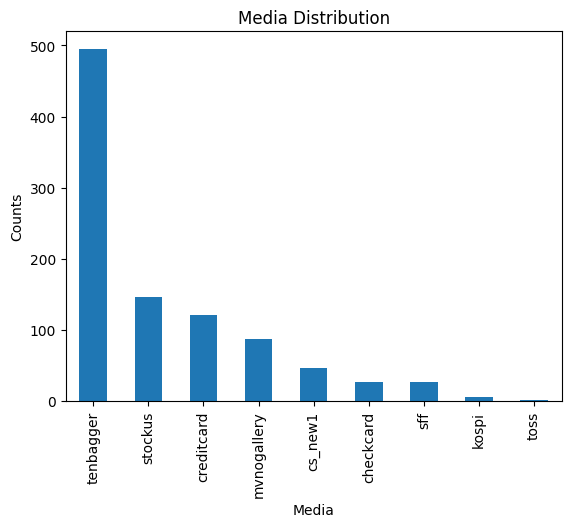

In [59]:
media_counts_187 = df_187['media'].value_counts()
media_counts_187.plot(kind='bar', title='Media Distribution')
plt.xlabel('Media')
plt.ylabel('Counts')
plt.show()

In [62]:
# 데이터 파일로 저장
df_187.to_csv("df_187.csv", index=False, encoding="utf-8")

### 3-f. week 188

In [60]:
df_188 = df_filtered[df_filtered['week'] == 188].reset_index(drop=True)

# 결과 확인
df_188.tail(20)

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
998,2023-08-15,토스 커뮤에 어줍잖은 허접 개많네 ㄹㅇ,https://gall.dcinside.com/mgallery/board/view/...,stockus,속슬이 시발 엔비하나만으로 이루어져있냐 병신아,1,188,속슬이 시 발 엔 비하나만으로 이루어져 있냐 병신아,"['하나', '병신아']",['하나 병신아']
999,2023-08-15,적립식 장투 하려고 하는데 키움vs토스,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,단 1원이라도 아끼려면 키움 관리 편하고 자주 보고 싶으면 토스,1,188,단 1원이라도 아끼려면 키움 관리 편하고 자주 보고 싶으면 토스,"['아끼', '키움', '관리', '편하', '토스']","['아끼 키움', '키움 관리', '관리 편하', '편하 토스']"
1000,2023-08-15,토스데이장떼돈버는법,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,토스데이장떼돈버는법 토스 데이장 상한가없는걸로 어제 몇천퍼씩오름1명이 시작한거다어제...,0,188,토스데이장 떼돈 버는 법 토스 데이장 상한가 없는 걸로 어 제 몇 천퍼씩 오름 1명...,"['토스', '데이', '떼돈', '토스', '데이', '상한', '시작', '어제...","['토스 데이', '데이 떼돈', '떼돈 토스', '토스 데이', '데이 상한', ..."
1001,2023-08-15,토스데이장떼돈버는법,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,블랙베리 검색하고 거래량 보세요ㅋㅋ..,1,188,블랙베리 검색하고 거래량 보세요 ㅋㅋ..,"['블랙베리', '검색', '거래량']","['블랙베리 검색', '검색 거래량']"
1002,2023-08-15,토스데이장떼돈버는법,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,다 아는 사실,1,188,다 아는 사실,['사실'],['사실']
1003,2023-08-15,토스데이장떼돈버는법,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,도박장인데 제제없는게신기하네,1,188,도박장인데 제제 없는 게 신기하네,"['도박장', '제제']",['도박장 제제']
1004,2023-08-15,토스데이장떼돈버는법,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,상한가 없는건 어캐봄?,1,188,상한가 없는 건 어 캐봄?,['상한'],['상한']
1005,2023-08-15,토스데이장떼돈버는법,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,어제까지 상한가없었음 오늘부터 30퍼넘어가면 체결이안됨,1,188,어제까지 상한가 없었음 오늘부터 30퍼 넘어가면 체결이 안 됨,"['어제', '상한', '오늘', '넘어가', '체결']","['어제 상한', '상한 오늘', '오늘 넘어가', '넘어가 체결']"
1006,2023-08-15,토스 커뮤에 어줍잖은 허접 개많네 ㄹㅇ,https://gall.dcinside.com/mgallery/board/view/...,stockus,이동선 존나 잘맞는데,1,188,이동선 존 나 잘 맞는데,['동선'],['동선']
1007,2023-08-15,토스 선동충 어이가없노,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,트럼프 프사새끼 맞지 ? ㅋㅋㅋ,1,188,트럼프 프사 새끼 맞지 ? ㅋㅋㅋ,['트럼프'],['트럼프']


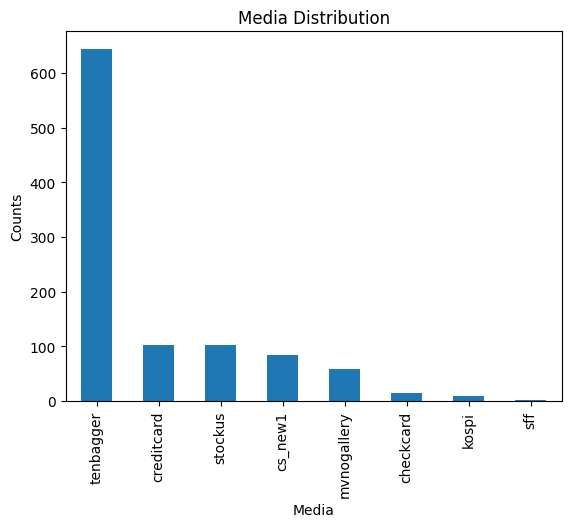

In [61]:
media_counts_188 = df_188['media'].value_counts()
media_counts_188.plot(kind='bar', title='Media Distribution')
plt.xlabel('Media')
plt.ylabel('Counts')
plt.show()

In [63]:
# 데이터 파일로 저장
df_188.to_csv("df_188.csv", index=False, encoding="utf-8")

## 4. "앱" 키워드

In [2]:
filtered_df = df[df['spaced_content'].str.contains("앱", na=False)]
filtered_df

,date,title,url,media,content,is_comment,week,spaced_content,tokens,bigrams
79,2020-03-08,신용카드 잘 아는사람,https://gall.dcinside.com/board/view/?id=credi...,creditcard,앱카드 등촉하라고 문자오거나 비밀번호 등록하라고 전화로면 발급 된것,1,9,앱카드 등 촉하라고 문자 오거나 비밀번호 등록하라고 전화로면 발급 된 것,"['카드', '촉하', '문자', '비밀', '번호', '등록', '전화', '발급']","['카드 촉하', '촉하 문자', '문자 비밀', '비밀 번호', '번호 등록', ..."
96,2020-03-12,나 신카 만들 수 있니?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,주택청약 어디껀데. 나 대학생이고 알바는 그냥 고용보험만 든거 조금 하는데. 국민은...,1,10,주택청약 어디껀데. 나 대학생이고 알바는 그냥 고용보험만 든 거 조금 하는데. 국민...,"['주택', '청약', '대학', '알바', '고용', '보험', '국민은행', '...","['주택 청약', '청약 대학', '대학 알바', '알바 고용', '고용 보험', ..."
114,2020-03-14,사람을 설득하는데 중요한 3가지가..,https://gall.dcinside.com/mgallery/board/view/...,stockus,팁) 이 앱등이는 주식을 하면 안 된다,1,10,팁) 이 앱 등이는 주식을 하면 안 된다,['주식'],['주식']
142,2020-03-23,우리카드 첫발급 질문,https://gall.dcinside.com/board/view/?id=credi...,creditcard,우리카드 첫발급 질문 주택청약 만들러 우리은행갔는데 혹시 몰라서 나 신카 발급 되냐...,0,11,우리카드 첫 발급 질문 주택청약 만들러 우리은행 갔는데 혹시 몰라서 나 신카 발급 ...,"['우리', '카드', '발급', '질문', '주택', '청약', '만들러', '우...","['우리 카드', '카드 발급', '발급 질문', '질문 주택', '주택 청약', ..."
162,2020-04-02,토스 신카 혜택만 낼름받고 해지하는거 가능한가여?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,토스 앱에서 하면 쌉가능,1,13,토스 앱에서 하면 쌉 가능,"['토스', '가능']",['토스 가능']
...,...,...,...,...,...,...,...,...,...,...
68560,2023-09-29,토스 앱장 종료 주사위는 던져졌다,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,토스 앱장 종료 주사위는 던져졌다 9시까지 0.44는 찍어놓자,0,195,토스 앱 장 종료 주사위는 던져졌다 9시까지 0.44는 찍어놓자,"['토스', '종료', '주사위']","['토스 종료', '종료 주사위']"
68577,2023-09-29,노보 0.41 깨졌네,https://gall.dcinside.com/mgallery/board/view/...,tenbagger,아 ㅅㅂ 아까 앱장에 있던 매도벽으로 호가 밀던 새끼가 시외장서도 그러고 있는거 아님?,1,195,아 ㅅㅂ 아까 앱장에 있던 매도 벽으로 호가 밀던 새끼가 시 외장서도 그러고 있는 ...,"['매도', '외장', '그러']","['매도 외장', '외장 그러']"
68646,2023-09-30,29일 밤에 계속 시도해서 긁은거 기록에 안남아있는데?,https://gall.dcinside.com/board/view/?id=credi...,creditcard,29일 밤에 계속 시도해서 긁은거 기록에 안남아있는데? 영수증까지 받았는데 앱에서도...,0,195,29일 밤에 계속 시도 해서 긁은 거 기록에 안 남아 있는데? 영수증까지 받았는데 ...,"['시도', '기록', '영수증', '토스', '기록']","['시도 기록', '기록 영수증', '영수증 토스', '토스 기록']"
68654,2023-09-30,인터넷뱅킹은 토스 미만잡이냐,https://gall.dcinside.com/board/view/?id=credi...,creditcard,카뱅은 예전 이자율 높고 ui 편했는데지금은 이자율 별로고 토스가 편한 것 같고카뱅...,1,195,카뱅은 예전 이자율 높고 ui 편했는데 지금은 이자율 별로 고 토스가 편한 것 같고...,"['카뱅', '예전', '이자', '자율', '토스', '카뱅', '실행']","['카뱅 예전', '예전 이자', '이자 자율', '자율 토스', '토스 카뱅', ..."


In [3]:
# 데이터 파일로 저장
filtered_df.to_csv("toss_앱.csv", index=False, encoding="utf-8")